In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path
import sys
# Set sys path
sys.path.append(str(Path(os.getcwd()).parent))

In [4]:
# Adjust matplotlib settings for font inclusion
plt.rcParams['pdf.fonttype'] = 42  # Use Type 3 (PostScript) fonts
plt.rcParams['ps.fonttype'] = 42

# Set filpaths for data and figures
notebook_dir = os.getcwd()
file_path = Path(notebook_dir).parent / 'data' 

# Load data

In [5]:
df = pd.read_csv(file_path / "AD_CSF_full_study.pg_matrix.tsv", sep='\t')
gene_dict = dict(zip(df['Protein.Group'], df['Genes']))
prot = df.set_index('Protein.Group').iloc[:,4:].T
prot.index = [a.split('/')[-1] for a in prot.index]
prot.index = [a.split('.')[0] for a in prot.index]
prot = np.log10(prot.replace(0, np.nan))

In [6]:
d_groups = pd.read_excel(file_path / "annotation of samples_AM1.5.11.xlsx")
d_groups = d_groups.dropna(subset='sample name')
cat = d_groups.set_index('sample name')[['biochemical AD classification']]
cat.index = [a.split('.')[0] for a in cat.index]

In [7]:
prot

Protein.Group,A0A075B6H9,A0A075B6I0,A0A075B6I1,A0A075B6I9,A0A075B6J1,A0A075B6J9,A0A075B6K0,A0A075B6K2,A0A075B6K4,A0A075B6K5,...,Q9Y696,Q9Y6C2,Q9Y6N6,Q9Y6N7;Q9Y6N7-2;Q9Y6N7-4,Q9Y6N8,Q9Y6R7,Q9Y6V0,Q9Y6X5,Q9Y6Y8;Q9Y6Y8-2,Q9Y6Y9
20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1_sampleA01,7.480833,7.302456,6.647976,6.121093,6.600015,6.554883,NaN,NaN,6.504421,6.693986,...,6.055936,6.081902,6.031582,7.102718,6.282182,7.437083,NaN,6.438099,7.426393,5.289968
20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1_sampleA02,7.441959,7.746394,6.638860,6.231620,5.864990,6.587256,NaN,6.309164,6.668147,6.818795,...,6.423252,5.980694,6.022086,7.101586,6.245616,7.653848,NaN,6.394618,7.337615,5.657931
20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1_sampleA03,7.235592,7.064080,6.171779,NaN,6.231123,5.679444,NaN,NaN,6.592845,6.523035,...,6.112250,6.019868,6.116644,7.210112,6.405758,7.333838,NaN,6.407980,7.653758,5.217313
20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1_sampleA04,7.306348,7.113740,7.071628,6.247990,5.953249,NaN,NaN,5.977618,6.916297,6.583331,...,5.970826,6.392444,6.074454,7.193308,6.384404,7.281910,NaN,6.564269,7.563945,5.180619
20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM1_sampleA05,7.660938,7.722260,6.943109,6.659052,6.947768,5.891934,NaN,6.369413,6.988021,7.008975,...,6.163978,6.210072,6.165550,7.127468,6.272102,7.368897,NaN,6.496894,7.516431,5.399558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190228_QX1_PhGe_SA_EASY12-10_Deigendesch_H1_82881356,7.623485,8.072801,7.797684,6.382836,6.019465,7.619711,NaN,NaN,7.151217,7.151345,...,6.337048,6.275281,6.124951,6.991466,6.012922,7.510652,6.333737,6.108562,7.048034,NaN
20190228_QX1_PhGe_SA_EASY12-10_Deigendesch_H3_129190521_repeat,6.857060,7.228693,NaN,6.257892,5.734560,6.490342,NaN,5.624568,6.524322,6.530417,...,6.202314,6.224007,6.159387,7.210308,6.496517,7.017083,NaN,6.531516,7.595730,NaN
20190228_QX1_PhGe_SA_EASY12-10_Deigendesch_H5_82544762_190309202008,6.988398,7.329800,6.503360,6.072121,NaN,5.834677,5.540344,5.865606,6.897995,6.781659,...,6.540621,6.169436,6.300208,7.145038,6.427223,7.262161,6.476005,6.005013,7.160448,NaN
20190228_QX1_PhGe_SA_EASY12-10_Deigendesch_H7_129187195,7.103817,7.066113,6.444338,NaN,6.295103,7.086769,NaN,5.660323,6.605919,6.366115,...,6.319087,6.294654,6.253205,7.170763,6.380866,7.243284,NaN,6.397130,7.428502,NaN


In [8]:
d_groups

,sample name,collection site,age,gender,t-tau [ng/L],p-tau [ng/L],Abeta-42 [ng/L],Abeta-40 [ng/L],Abeta ratio,biochemical AD classification,clinical AD diagnosis,MMSE score,cohort sample ID,comment
0,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...,Sweden,71.0,f,703.0,85.0,562.0,NaN,NaN,biochemical control,NaN,NaN,ID_708,NaN
1,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...,Sweden,77.0,m,518.0,91.0,334.0,NaN,NaN,biochemical AD,NaN,NaN,ID_722,NaN
2,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...,Sweden,75.0,m,974.0,87.0,515.0,NaN,NaN,biochemical AD,NaN,NaN,ID_734,NaN
3,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...,Sweden,72.0,f,950.0,109.0,394.0,NaN,NaN,biochemical AD,NaN,NaN,ID_742,NaN
4,20180618_QX0_JaBa_SA_LC12_5_CSF1_1_8-1xD1xS1fM...,Sweden,63.0,f,873.0,88.0,234.0,NaN,NaN,biochemical AD,NaN,NaN,ID_757,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,20190228_QX1_PhGe_SA_EASY12-10_Deigendesch_H3_...,Berlin,69.0,f,1945.0,NaN,699.0,12140.0,0.057578,biochemical AD,AD,17.0,ID_0129190521,NaN
208,20190228_QX1_PhGe_SA_EASY12-10_Deigendesch_H5_...,Berlin,73.0,m,299.0,NaN,1420.0,16571.0,0.085692,biochemical control,non-AD,28.0,ID_0082544762,NaN
209,20190228_QX1_PhGe_SA_EASY12-10_Deigendesch_H7_...,Berlin,71.0,f,262.0,NaN,639.0,9663.0,0.066129,biochemical control,non-AD,28.0,ID_0129187195,NaN
210,20190228_QX1_PhGe_SA_EASY12-10_Deigendesch_H9_...,Berlin,83.0,m,289.0,NaN,1436.0,11285.0,0.127249,biochemical control,non-AD,24.0,ID_0082875993,NaN


# Unsupervised EDA

In [9]:
from sklearn.impute import KNNImputer
transposed_df = prot

# Applying KNN imputation on the transposed DataFrame
imputer = KNNImputer(n_neighbors=5)
imputed_transposed_df = imputer.fit_transform(transposed_df)

# Convert imputed array back to DataFrame
imputed_samples_df = pd.DataFrame(imputed_transposed_df, index=transposed_df.index, columns=transposed_df.columns)
imputed_samples_df.columns = df['Protein.Group']

In [10]:
d_groups['sample name'] = d_groups['sample name'].str.split('.').str[0]

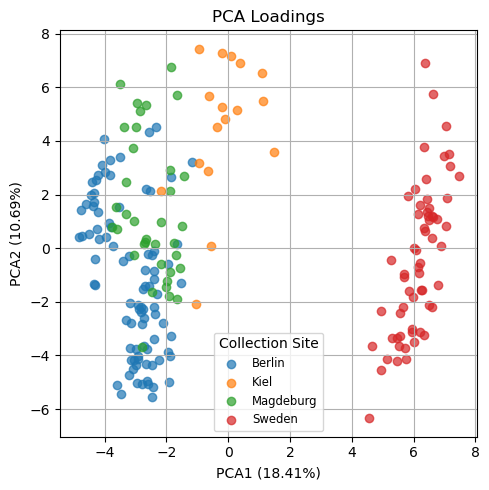

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib

# Run PCA
pca = PCA(n_components=2)
pca_result_samples = pca.fit_transform(imputed_samples_df)
explained_variance = pca.explained_variance_ratio_

# Create PCA results DataFrame
pca_samples_df = pd.DataFrame(data=pca_result_samples, index=imputed_samples_df.index, columns=['PCA1', 'PCA2'])
pca_samples_df['site'] = d_groups.set_index('sample name')['collection site']

# Set up figure
fig, ax = plt.subplots(figsize=(5, 5))

# Plot by site
for site, group_df in pca_samples_df.groupby('site'):
    ax.scatter(group_df['PCA1'], group_df['PCA2'], label=site, alpha=0.7)

# Add labels and legend
ax.set_xlabel(f"PCA1 ({explained_variance[0]*100:.2f}%)")
ax.set_ylabel(f"PCA2 ({explained_variance[1]*100:.2f}%)")
ax.set_title("PCA Loadings")
ax.legend(title='Collection Site', loc='best', fontsize='small')
ax.grid(True)

# Save to PDF
plt.tight_layout()
plt.savefig("pca_plot.pdf")
plt.show()

# xgboost with holdout_batch testset and scambled labels

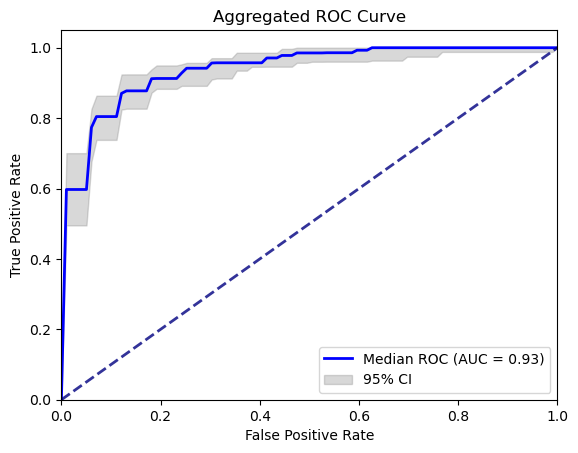

In [ ]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot, cat, gene_dict, between='biochemical AD classification')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot('biochemical control', 'biochemical AD', n_runs=10, n_estimators=100)

Running iteration 1/10
Running iteration 2/10
Running iteration 3/10
Running iteration 4/10
Running iteration 5/10
Running iteration 6/10
Running iteration 7/10
Running iteration 8/10
Running iteration 9/10
Running iteration 10/10


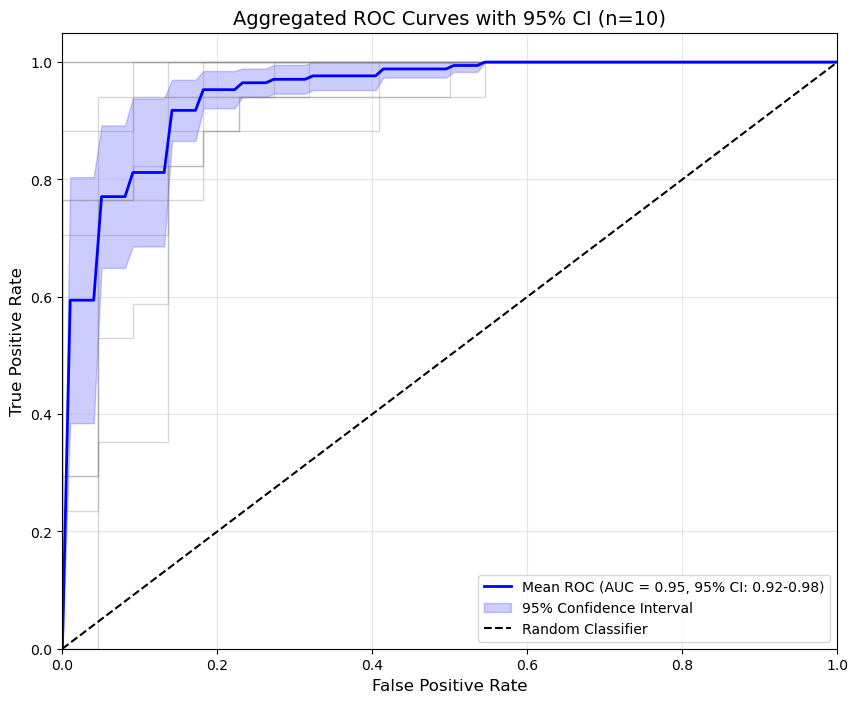

Plots saved to d:\Notebooks\ADAPT-MS\data\AD_CSF_fullcohort_10x_5foldCV.pdf


In [28]:
from utils.NonValClassifier import NonValClassifier

classifier = NonValClassifier(prot, cat, gene_dict, between='biochemical AD classification')

# Run the multiple train-test split process
classifier.classify_and_plot_multiple(
    category1="biochemical control", 
    category2='biochemical AD', 
    num_repeats=10
)

classifier.save_plots_to_pdf(file_path / 'AD_CSF_fullcohort_10x_5foldCV.pdf')